### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak naprawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

Reprentacja ab nie sprawdzi się dla prostych pionowych lub prawie pionowych

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks

def hough_AB(image, a_min, a_max, a_skok, b_min, b_max, b_skok):
    y_size, x_size = image.shape
    a_vec = np.arange(a_min, a_max, a_skok)
    b_vec = np.arange(b_min, b_max, b_skok)

    H_mac = np.zeros((a_vec.shape[0], b_vec.shape[0]))

    for i in range(y_size):
        for j in range(x_size):
            if image[i, j] > 0:
                for a_idx, a in enumerate(a_vec):
                    b = i - a * j
                    b_idx = np.argmin(abs(b_vec-b))
                    H_mac[a_idx, b_idx] += 1

    return H_mac

def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].set_aspect('equal')
    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('b')
    ax[1].set_ylabel('a')
    ax[1].axis('image')

    plt.tight_layout()
    plt.show()

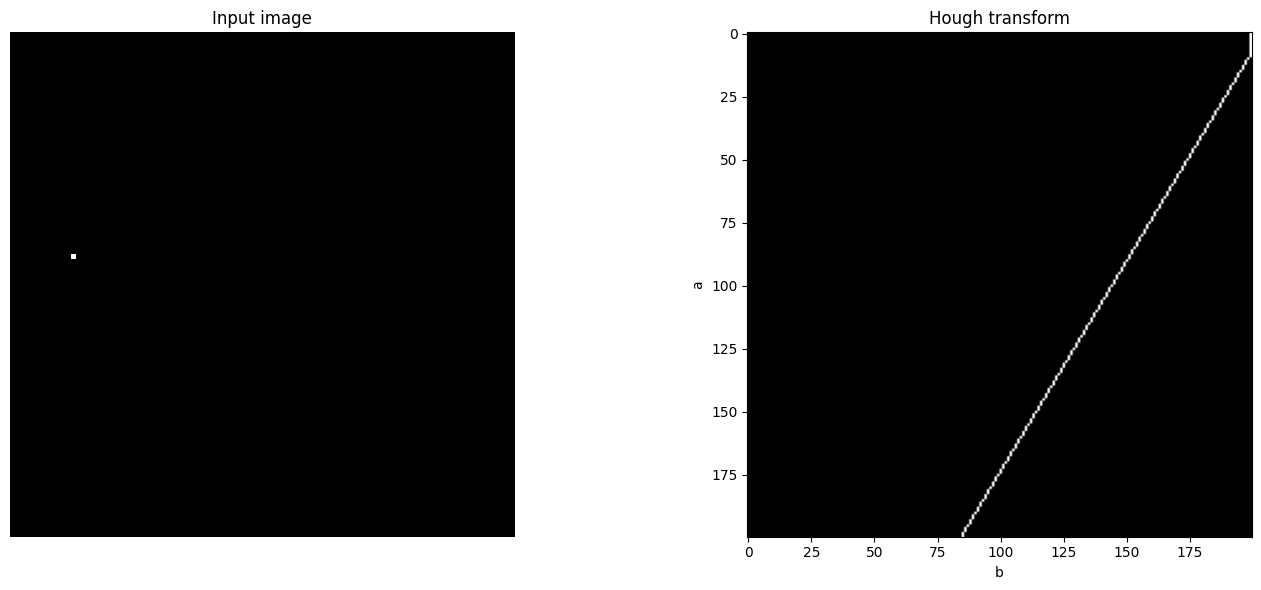

In [12]:
im = np.zeros((100,100), dtype=np.uint8)

im[44, 12] = 1

H = hough_AB(im, -5, 5, 0.05, -100, 100, 1)

show_hough(H, im)

In [ ]:
im = np.zeros((64,64), dtype=np.uint8)

im[12, 18] = 1
im[12 + 5, 18 + 5] = 1
im[12 + 20, 18 + 20] = 1
im[12 + 40, 18 + 40] = 1
im[12 - 6, 18 - 6] = 1

H = hough_AB(im, -5, 5, 0.05, -100, 100, 1)

show_hough(H, im)

In [ ]:
im = np.zeros((64,64), dtype=np.uint8)

a = 0
b = 4

im[12, 18] = 1
im[12+a, 18+b] = 1
im[12+3*a, 18+3*b] = 1
im[12+10*a, 18+10*b] = 1
im[12+5*a, 18+5*b] = 1


H = hough_AB(im, -5, 5, 0.05, -100, 100, 1)

show_hough(H, im)

In [ ]:
im = np.zeros((64,64), dtype=np.uint8)

a = 4
b = 0

im[12, 18] = 1
im[12+a, 18+b] = 1
im[12+3*a, 18+3*b] = 1
im[12+10*a, 18+10*b] = 1
im[12+5*a, 18+5*b] = 1


H = hough_AB(im, -5, 5, 0.05, -100, 100, 1)

show_hough(H, im)

In [ ]:
im = np.zeros((64,64), dtype=np.uint8)


for a in range(10):
    im[20+a, 20+a] = 1
for a in range(10):
    im[10+a, 30+a] = 1
for a in range(10):
    im[20-a, 20+a] = 1
for a in range(10):
    im[29-a, 29+a] = 1


H = hough_AB(im, -5, 5, 0.05, -100, 100, 1)

show_hough(H, im)